In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
import time
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'metrics'

In [46]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train = pd.read_csv(r'C:\Users\Dhwani\Desktop\Datasets\titanic\train.csv')
test = pd.read_csv(r'C:\Users\Dhwani\Desktop\Datasets\titanic\test.csv')
gender_submission = pd.read_csv(r'C:\Users\Dhwani\Desktop\Datasets\titanic\gender_submission.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


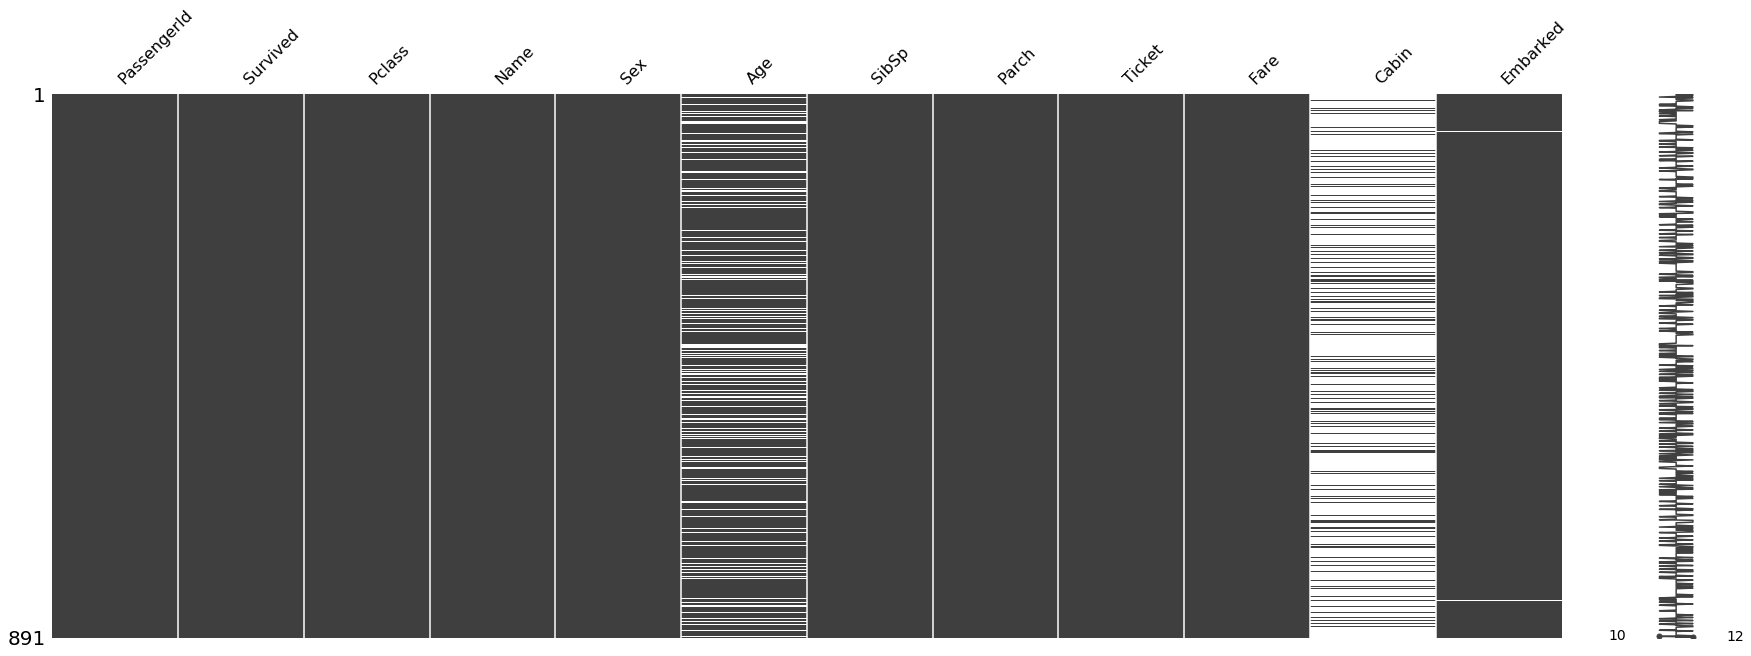

In [8]:
missingno.matrix(train, figsize = (30, 10))

In [ ]:
def find_missing_values(df, columns):
    df_len = len(df)
    missing_vals = {}
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_len - total_column_values
    return missing_vals

missing_values = find_missing_values(train, train.columns)
missing_values

In [9]:
df_disc_cont = pd.DataFrame()
df_cont = pd.DataFrame()

0    549
1    342
Name: Survived, dtype: int64


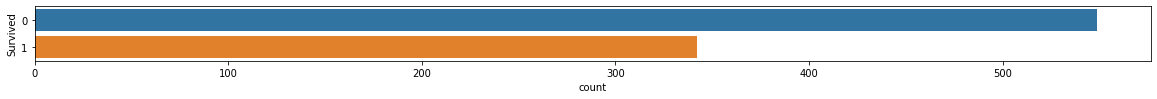

In [10]:
# No of people that survived

fig = plt.figure(figsize=(20, 1))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())
df_disc_cont['Survived'] = train['Survived']
df_cont['Survived'] = train['Survived']

In [11]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

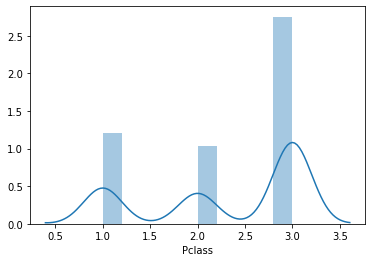

In [12]:
sns.distplot(train.Pclass)

In [14]:
df_disc_cont['Pclass'] = train['Pclass']
df_cont['Pclass'] = train['Pclass']

In [15]:
df_cont.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [16]:
df_disc_cont['Sex'] = train['Sex']
df_disc_cont['Sex'] = np.where(df_disc_cont['Sex'] == 'female', 1, 0)
df_cont['Sex'] = train['Sex']

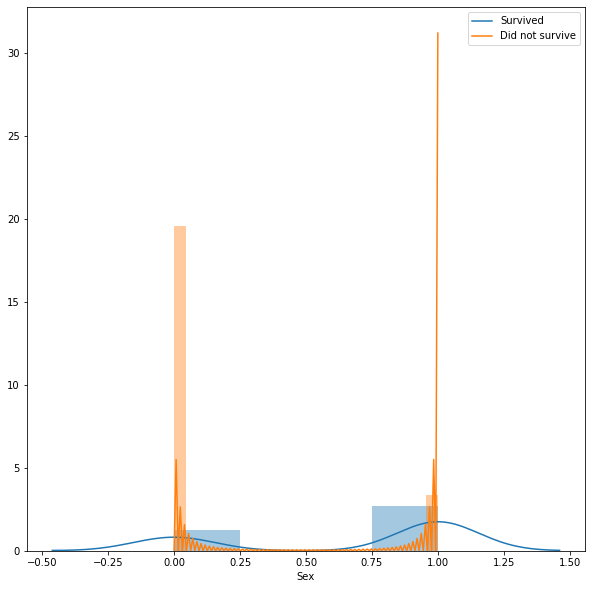

In [17]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_disc_cont.loc[df_disc_cont['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'})
sns.distplot(df_disc_cont.loc[df_disc_cont['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'})

In [18]:
df_disc_cont['SibSp'] = train['SibSp']
df_cont['SibSp'] = train['SibSp']

In [19]:
df_disc_cont['Parch'] = train['Parch']
df_cont['Parch'] = train['Parch']

In [20]:
df_disc_cont['Fare'] = train['Fare']
df_cont['Fare'] = train['Fare']

In [21]:
df_disc_cont['Embarked'] = train['Embarked']
df_cont['Embarked'] = train['Embarked']

In [22]:
df_disc_cont = df_disc_cont.dropna(subset=['Embarked'])
df_cont = df_cont.dropna(subset=['Embarked'])
print(len(df_cont['Embarked']))

889


In [24]:
one_hot_cols = df_disc_cont.columns.tolist()
one_hot_cols.remove('Survived')
df_disc_cont = pd.get_dummies(df_disc_cont, columns = one_hot_cols)

df_disc_cont.head()

,Survived,Pclass_1_0,Pclass_1_1,Pclass_2_0,Pclass_2_1,Pclass_3_0,Pclass_3_1,Sex_0_0,Sex_0_1,Sex_1_0,...,Fare_263.0_0,Fare_263.0_1,Fare_512.3292_0,Fare_512.3292_1,Embarked_C_0,Embarked_C_1,Embarked_Q_0,Embarked_Q_1,Embarked_S_0,Embarked_S_1
0,0,1,0,1,0,0,1,0,1,1,...,1,0,1,0,1,0,1,0,0,1
1,1,0,1,1,0,1,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0
2,1,1,0,1,0,0,1,1,0,0,...,1,0,1,0,1,0,1,0,0,1
3,1,0,1,1,0,1,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1
4,0,1,0,1,0,0,1,0,1,1,...,1,0,1,0,1,0,1,0,0,1


In [26]:
df_con = df_cont.apply(LabelEncoder().fit_transform)
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2


In [27]:
# Training the model

total_dis_data = df_con

In [28]:
X_train = total_dis_data.drop('Survived', axis=1)
y_train = total_dis_data.Survived

In [30]:
X_train.shape

(889, 6)

In [54]:
# function for fitting using different algos

def fit_algo(algo, X_train, y_train, cv):
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    train_pred = cross_val_predict(algo, X_train, y_train, cv = cv, n_jobs = -1)
    acc_cv = round(accuracy_score(y_train, train_pred) * 100, 2)
    
    return model, train_pred, acc, acc_cv

In [55]:
start_time = time.time()
fit_model, train_pred_log, acc_log, acc_cv_log = fit_algo(LogisticRegression(), X_train, y_train, 25)

log_time = time.time() - start_time
print("Accuracy:"+ str(acc_log))
print("Accuracy_CV:" + str(acc_cv_log))
print("Time taken:" + str(log_time))

Accuracy:79.08
Accuracy_CV:78.63
Time taken:3.6740071773529053


In [56]:
sub_columns = df_cont.drop('Survived', axis = 1).columns
sub_columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [60]:
predictions = fit_model.predict(test[sub_columns].apply(LabelEncoder().fit_transform))
predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [62]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [63]:
if(len(submission) == len(test)):
    print("YES")
else:
    print("NO")

YES


In [66]:
submission.to_csv('../logistic_regression_submission.csv', index=False)

In [67]:
submission_check = pd.read_csv('../logistic_regression_submission.csv')
submission_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
